In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задания №1.1**
Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте OneHotEncoder.

In [ ]:
missing_values = X.isnull().sum().sum()
missing_values

0

In [ ]:
categorical_columns = [colum for colum in X.columns if X[colum].dtype == 'object']
categorical_columns

[]

Как видим пропусков нет, как и категориальных переменных

**Задание №1.2**
Используя функцию train_test_split(), разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать np.random.seed() для воспроизводимости результатов.

Используйте аргумент stratify при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(f'Выборка train для X: {X_train.shape}')
print(f'Выборка test для X: {X_test.shape}')
print(f'Выборка train для y: {len(y_train)}')
print(f'Выборка test для y: {len(y_test)}')

Выборка train для X: (124, 13)
Выборка test для X: (54, 13)
Выборка train для y: 124
Выборка test для y: 54


***stratify*** применяется для предотвращения дисбаланса. При разделении данных на тренировочную и тестовую выборку соотношение классов сохранится таким же, каким оно было до разделения. Так мы избегаем переобучение.

**Задание №1.3**
На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр n_neighbours класса KNeighborsClassifier). Для обучения используйте только два признака: alcohol и magnesium – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля StandardScaler.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
train_accuracies = []
test_accuracies = []

X_train_subset = X_train[['alcohol', 'magnesium']]
X_test_subset = X_test[['alcohol', 'magnesium']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

for n in [1, 3, 5, 10, 15, 25]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)

    y_train_pred = knn.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    y_test_pred = knn.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

print("NN   Train   Test")
for n, train_acc, test_acc in zip([1, 3, 5, 10, 15, 25], train_accuracies, test_accuracies):
    print(f"{n}   {train_acc:.2f}   {test_acc:.2f}")

NN   Train   Test
1   1.00   0.56
3   0.80   0.63
5   0.78   0.63
10   0.75   0.65
15   0.72   0.63
25   0.69   0.69


**Задание №1.4**


In [ ]:
!pip install mlxtend
import mlxtend

**Задание №1.5**
Библиотека mlxtend позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите документацию библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

Подсказки:

Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
Обратите внимание на то, как нужно изменить параметры gridspec.GridSpec() и itertools.product() для нашего числа классификаторов.
В функции plot_decision_region() используйте y_train и нужные столбцы из X_train. Возможно, их придётся перевести в формат массива numpy.
Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
Построение графика может занять некоторое время – придётся немного подождать!

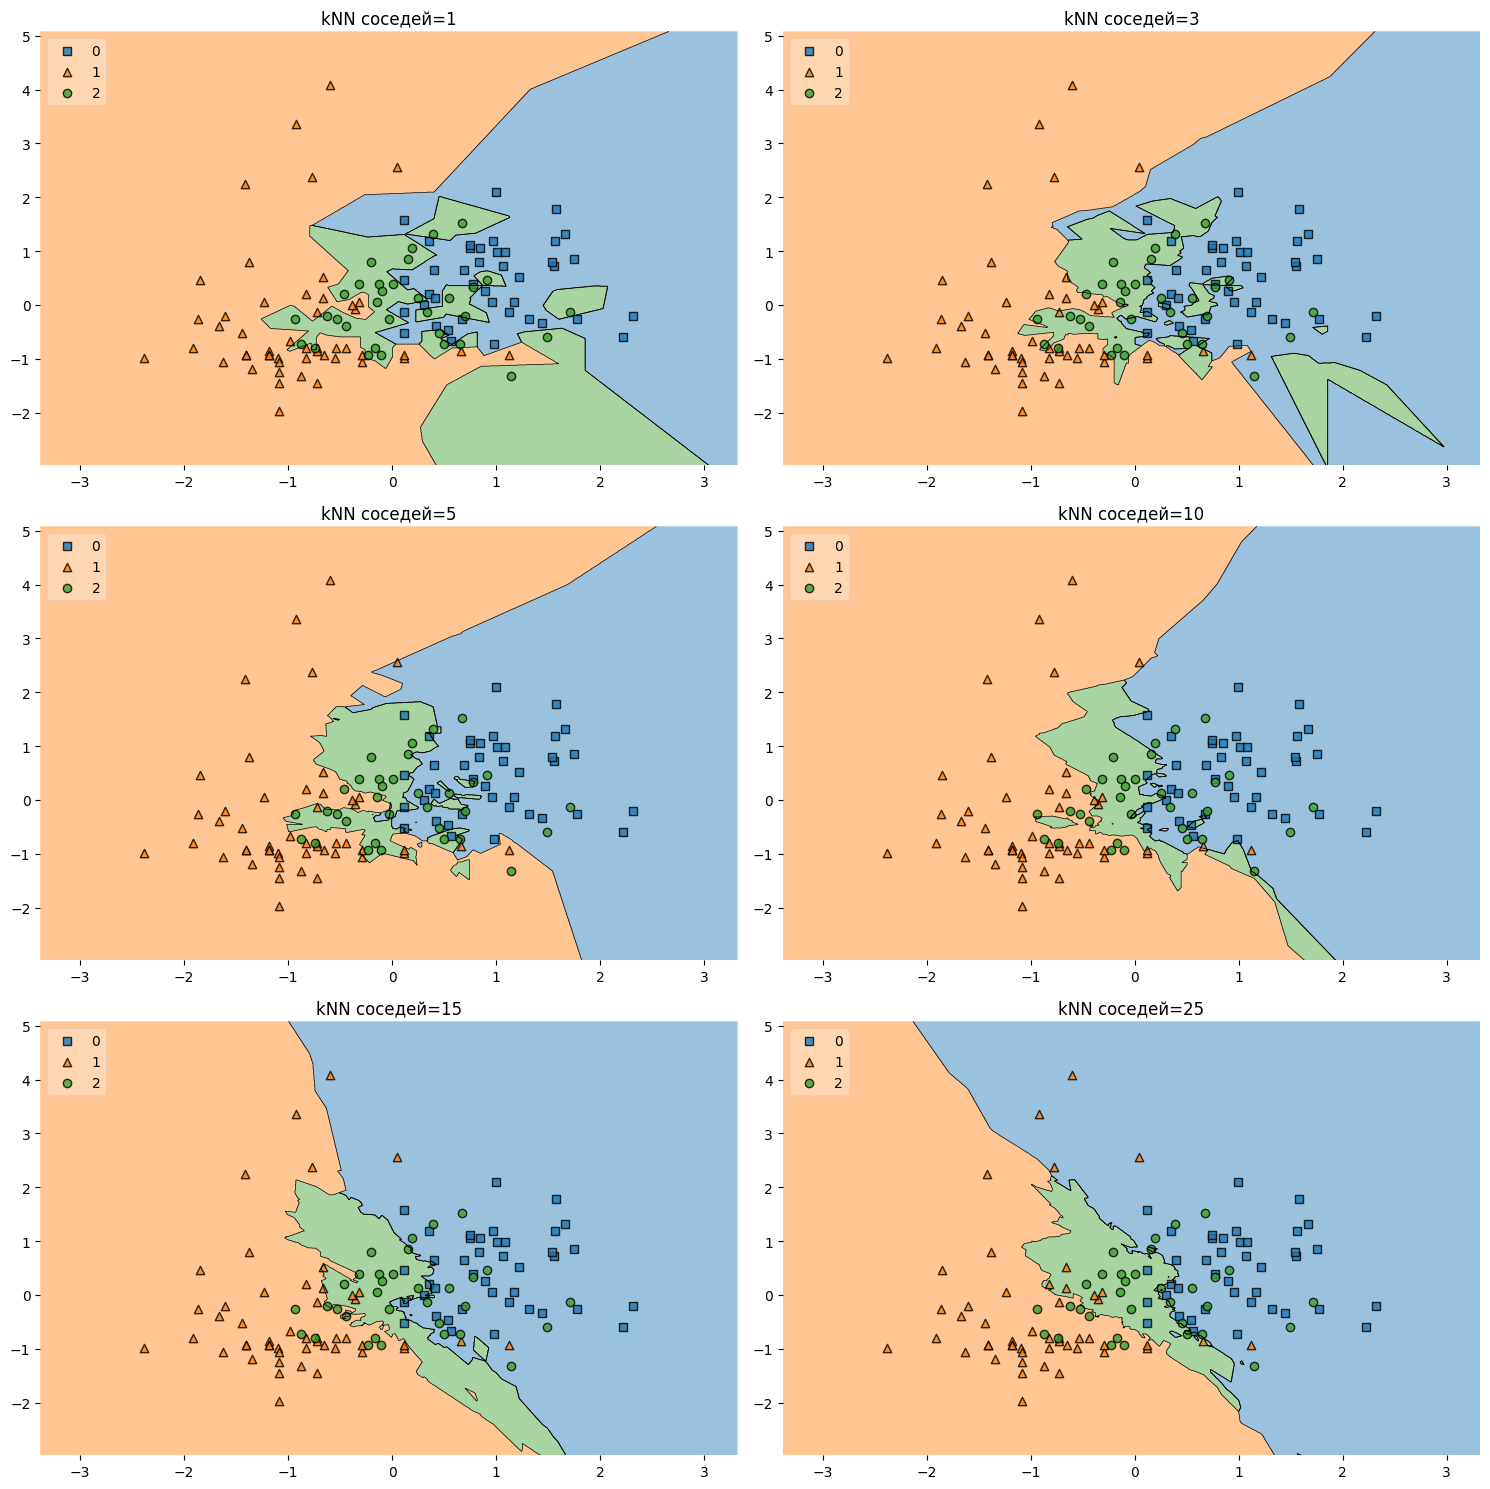

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    n_neighbors = [1, 3, 5, 10, 15, 25][i]
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)

    plot_decision_regions(X_train_scaled, y_train, clf=knn, legend=2, ax=ax)
    ax.set_title(f'kNN соседей={n_neighbors}')

plt.tight_layout()
plt.show()

**Задача 1.6**
Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Видим, что k = 25 является наиболее оптимальным выбором, на тренировочной выборке доля правильных ответов 0.69, как и на тестовой. Модель не переобучена, и показывает наилучший результат. При k = 1, 3, 5 явно видны 'острава' решающих поверхностей, это говорит о переобучении, поверхности должны иметь определенные границы и быть более менее монотонными, как при k = 10, 15, 25.

**Задание 2. KNN своими руками.**

In [ ]:
from collections import Counter
class KNN:
    def __init__(self, k: int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self._count_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _count_distance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задание 3: Линейная регрессия.**

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.1**  Есть ли в наборе данных пропущенные значения? Если да, удалите их. Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
missing_values = data.isnull().sum().sum()
missing_values

0

In [ ]:
data = data.drop('Unnamed: 0', axis=1)
for col in data.columns:
    if len(data[col].unique()) == 1:
        print(col)

Пустых значении нет, как и бессмысленных столбцов, кроме стобца 'Unnamed: 0', который просто нумерует объекты, его нужно удалить.

**Задача 3.2**  Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет
 строка, где
 – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
numeric_features = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()
target_correlations = correlation_matrix['price'].sort_values(ascending=False)

print(correlation_matrix)
print("\nВещественные признаки, коррелирующие с целевой переменной 'price':")
print(target_correlations)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

Вещественные признаки, коррелирующие с целевой переменной 'price':
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


Больше всего коррелирует с price - carat, x, y, z.

**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
categorical = data.select_dtypes(include=['object'])

data = pd.get_dummies(data, columns=categorical.columns)
data.head(5)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4**  Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр stratify.

In [ ]:
from sklearn.model_selection import train_test_split


X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер тренировочной выборки: (37758, 26)
Размер тестовой выборки: (16182, 26)


**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении
 на 1,
 увеличивается на
"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.6**  Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Среднеквадратичная ошибка на тренировочной выборке: {mse_train:.2f}')
print(f'Среднеквадратичная ошибка на тестовой выборке: {mse_test:.2f}')

Среднеквадратичная ошибка на тренировочной выборке: 1290541.91
Среднеквадратичная ошибка на тестовой выборке: 1244765.44


Как видим, среднеквадратичная ошибка огромная, скорее всего это из-за переобучения модели, необходимо применить ряд преобразовании над данными.

**Задача 3.7**  Изучите документацию модуля LinearRegression и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
coefficients = model.coef_
print("Оценки коэффициентов модели:")
for i, coef in enumerate(coefficients):
    print(f"Признак {X.columns[i]}: {coef}")

max_coef_index = np.argmax(np.abs(coefficients))
max_variable = X.columns[max_coef_index]
max_coef_value = coefficients[max_coef_index]


Оценки коэффициентов модели:
Признак carat: 5338.615670614762
Признак depth: -90.17381703342323
Признак table: -60.33227991027918
Признак x: -1100.4188500393166
Признак y: -6.458916720538805
Признак z: -34.25894462089235
Признак cut_Fair: -125.7110034412052
Признак cut_Good: -41.39598920939747
Признак cut_Ideal: 51.99220579030468
Признак cut_Premium: 16.46474064458982
Признак cut_Very Good: 1.3708073124382467
Признак color_D: 211.31054123871525
Признак color_E: 162.4826714410842
Признак color_F: 139.7702352224842
Признак color_G: 56.166466787025335
Признак color_H: -130.49754248396115
Признак color_I: -251.21000158162613
Признак color_J: -387.4978278456525
Признак clarity_I1: -473.8257100444955
Признак clarity_IF: 244.2233565041849
Признак clarity_SI1: -146.57593767851893
Признак clarity_SI2: -491.4787844607689
Признак clarity_VS1: 202.57492339556688
Признак clarity_VS2: 102.1803103878024
Признак clarity_VVS1: 253.97293766136386
Признак clarity_VVS2: 271.7804759281613


Наибольший коэф. у признака carat:-5338.61. У признака х:-1100, так же выделяется признак clarity_SI2: -491. Эти признаки будут оказывать значительное влияние на нашу модель.

**Задача 3.8 (0.4 балла)**

In [ ]:
from sklearn.linear_model import Lasso, Ridge


lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso_coefs = lasso.coef_


ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_coefs = ridge.coef_


print("Оценки коэффициентов для Lasso:")
for i, coef in enumerate(lasso_coefs):
    print(f"Признак {X.columns[i]}: {coef}")

print("\nОценки коэффициентов для Ridge:")
for i, coef in enumerate(ridge_coefs):
    print(f"Признак {X.columns[i]}: {coef}")

Оценки коэффициентов для Lasso:
Признак carat: 4872.156395555542
Признак depth: -57.093610226801644
Признак table: -47.68485714025148
Признак x: -652.157442236506
Признак y: -0.0
Признак z: -43.26536087565864
Признак cut_Fair: -126.50426086138296
Признак cut_Good: -42.8093219815303
Признак cut_Ideal: 41.69581461311703
Признак cut_Premium: 0.0
Признак cut_Very Good: -0.0
Признак color_D: 147.94933994739327
Признак color_E: 92.66322385141818
Признак color_F: 69.13936020331232
Признак color_G: -0.0
Признак color_H: -172.35946256725765
Признак color_I: -279.0145771370216
Признак color_J: -403.03069842773806
Признак clarity_I1: -488.72730005583065
Признак clarity_IF: 194.05330181892637
Признак clarity_SI1: -252.33566450272423
Признак clarity_SI2: -573.6356366611011
Признак clarity_VS1: 101.29825449161235
Признак clarity_VS2: -0.0
Признак clarity_VVS1: 187.4992627278212
Признак clarity_VVS2: 193.99715195310327

Оценки коэффициентов для Ridge:
Признак carat: 5301.289061920845
Признак depth: -

Видим, что Lasso - регуляризация занулила некоторые признаки и понизила коэффиценты, что должно улучшить точность модели. Ridge в свою очередь, почти никак не повлиял на значения коэффицентов. Все сходится к тому, что проблема мультиколлинеарности в изначальной регрессии не стоит остро.

**Задача 3.9**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


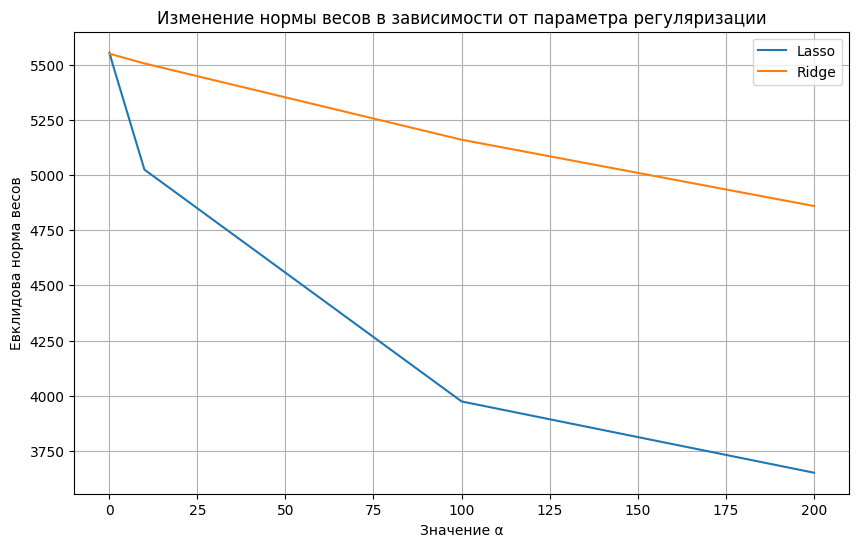

In [ ]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coefs = lasso.coef_
    lasso_norms.append(np.linalg.norm(lasso_coefs))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs = ridge.coef_
    ridge_norms.append(np.linalg.norm(ridge_coefs))

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Значение α')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение нормы весов в зависимости от параметра регуляризации')
plt.legend()
plt.grid(True)
plt.show()

Lasso-регрессия более агрессивно уменьшает веса по сравнению с Ridge-регрессией. График показывает, что Lasso активнее отбирает самые информативные признаки за счёт их уменьшения до нулевых значений, в то время как Ridge сохраняет больше признаков, линейно уменьшая их веса, но не зануляя. Главным плюсом Lasso является зануление, которое уменьшает датасет, что хорошо сказывается на точности и на скорости вычислении.

**Задача 3.10**

In [ ]:
from sklearn.linear_model import LassoCV
alphas = [0.1, 1, 10, 100, 200]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha = lasso_cv.alpha_
mean_mse_for_alphas = np.mean(lasso_cv.mse_path_, axis=1)

print(f"Оптимальное значение alpha: {best_alpha}")
print("Усредненные ошибки для каждого значения alpha:")
for i, alpha in enumerate(lasso_cv.alphas_):
    print(f"alpha={alpha}: Mean MSE = {mean_mse_for_alphas[i]}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499002729.7686577, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(


Оптимальное значение alpha: 1.0
Усредненные ошибки для каждого значения alpha:
alpha=200.0: Mean MSE = 1969075.7061619256
alpha=100.0: Mean MSE = 1546280.1637496245
alpha=10.0: Mean MSE = 1304386.220072653
alpha=1.0: Mean MSE = 1293680.522712245
alpha=0.1: Mean MSE = 1295600.1683831522


**Задача 3.11** (0.5 балла) Обучите итоговую Lasso-регрессию с выбранным параметром
 на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
from sklearn.linear_model import Lasso

lasso_final = Lasso(alpha=1.0)
lasso_final.fit(X_train, y_train)
coefficients_final = lasso_final.coef_
print("Коэффициенты модели Lasso-регрессии:")
for i, coef in enumerate(coefficients_final):
    print(f"Признак {X.columns[i]}: {coef}")

Коэффициенты модели Lasso-регрессии:
Признак carat: 5292.355925737536
Признак depth: -86.83998690755881
Признак table: -59.03530771484295
Признак x: -1057.1462022079072
Признак y: -4.2299505587411605
Признак z: -35.456798308299824
Признак cut_Fair: -131.51081447633405
Признак cut_Good: -51.211155618179475
Признак cut_Ideal: 34.46577884484188
Признак cut_Premium: 0.0
Признак cut_Very Good: -12.731587167698788
Признак color_D: 163.9940618196482
Признак color_E: 107.72566324715785
Признак color_F: 85.24588936702432
Признак color_G: -0.0
Признак color_H: -179.68433170248508
Признак color_I: -291.2483610776506
Признак color_J: -416.66679287274314
Признак clarity_I1: -500.71237836331073
Признак clarity_IF: 200.01145084978296
Признак clarity_SI1: -251.39626425574596
Признак clarity_SI2: -581.9524012885037
Признак clarity_VS1: 113.80466905329315
Признак clarity_VS2: -0.0
Признак clarity_VVS1: 192.08717076257727
Признак clarity_VVS2: 200.26757704902886


Как видим некоторые признаки так и сохрани свои огромные коэффиценты, отсюда можно придти к выводу, что они являются наиболее важными для предсказания price. Кроме того, некоторые признаки занулены, видимо они не несут никакой полезной информации, или даже ухудшают модель.

**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
from sklearn.metrics import mean_squared_error


y_test_pred_linear = model.predict(X_test)
y_test_pred_lasso = lasso_final.predict(X_test)

mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print(f'Среднеквадратичная ошибка обычной линейной регрессии на тестовой выборке: {mse_test_linear:.2f}')
print(f'Среднеквадратичная ошибка Lasso-регрессии на тестовой выборке: {mse_test_lasso:.2f}')

Среднеквадратичная ошибка обычной линейной регрессии на тестовой выборке: 1244765.44
Среднеквадратичная ошибка Lasso-регрессии на тестовой выборке: 1244864.74


Получилась ситуация, при которой обычная линейная регрессия предсказывает немного лучше, чем Lasso-регрессия, что на самом деле является странным. Предпологаемые причины такого феномена:

1.   Шум в данных и излишняя корреляция признаков.
2.   Значимость всех признаков.

По данной задаче можно придти к выводу, что лучше использовать обычную регрессию, она будет чуть точнее.
Для улучшения качества модели, скорее всего, необходимо провести ряд преобразовании данных.

